In [1]:
import pandas as pd # for handling dataset
import numpy as np  # for mathematical computation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data
df=pd.read_csv('Review_Prediction.csv')

In [3]:
df.head() 

,Unnamed: 0,Ratings,Full Review
0,0,5,It's very good to this price.....I really than...
1,1,5,Seriously awwsm .. pls go for it without any h...
2,2,5,Performance are too good and friendly budget a...
3,3,4,I am happy with this laptop. Good for basic us...
4,4,5,I have just received the laptop today and am v...


Dataset description

Ratings: It is the Label column, which includes ratings in the form of integers from 1 to 5.

Full_review: It contains text data on the basis of which we have to build a model to predict ratings.

In [4]:
print('Total no of rows & columns: ',df.shape)

Total no of rows & columns:  (22593, 3)


In [5]:
print('List of columns: ',df.columns)

List of columns:  Index(['Unnamed: 0', 'Ratings', 'Full Review'], dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22593 entries, 0 to 22592
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   22593 non-null  int64 
 1   Ratings      22593 non-null  int64 
 2   Full Review  22593 non-null  object
dtypes: int64(2), object(1)
memory usage: 529.6+ KB


In [7]:
# to count number of unique values in each columns 
df.nunique()

Unnamed: 0     22593
Ratings            5
Full Review     7457
dtype: int64

In [8]:
# to get high understanding of dataset or to get overview/stats of the dataset
df.describe()

,Unnamed: 0,Ratings
count,22593.000000,22593.000000
mean,11296.000000,4.161953
std,6522.181652,1.301836
min,0.000000,1.000000
25%,5648.000000,4.000000
50%,11296.000000,5.000000
75%,16944.000000,5.000000
max,22592.000000,5.000000


In [9]:
# to get high understanding of dataset or to get overview/stats of the dataset
df.describe()

,Unnamed: 0,Ratings
count,22593.000000,22593.000000
mean,11296.000000,4.161953
std,6522.181652,1.301836
min,0.000000,1.000000
25%,5648.000000,4.000000
50%,11296.000000,5.000000
75%,16944.000000,5.000000
max,22592.000000,5.000000


In [10]:
df.isnull().sum()

Unnamed: 0     0
Ratings        0
Full Review    0
dtype: int64

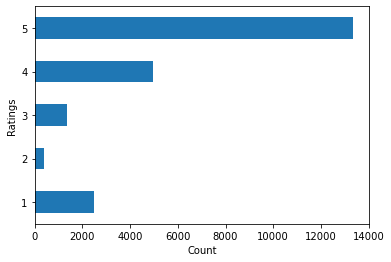

In [11]:
df.groupby('Ratings')['Ratings'].count().plot(kind='barh')
plt.xlabel('Count')
plt.show()

In [12]:
df['length']=df['Full Review'].str.len() #length of Full_review Column.
df.head()

,Unnamed: 0,Ratings,Full Review,length
0,0,5,It's very good to this price.....I really than...,127
1,1,5,Seriously awwsm .. pls go for it without any h...,258
2,2,5,Performance are too good and friendly budget a...,163
3,3,4,I am happy with this laptop. Good for basic us...,197
4,4,5,I have just received the laptop today and am v...,247


In [13]:
import re

import nltk
nltk.download('stopwords')

# download words from wordnet library
nltk.download('wordnet')
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [15]:
# defining function text cleaner to use on full review column
# Convert all comments text into lower case
# removing punctuation from full review column
# removing stopwords from full review column
# let's remove digits from the full review column
# Using Lemmatizing for converting words to its base form

def text_cleaner(text):
    clean_text = re.sub(r'@[A-Za-z0-9]+','',text)
    clean_text = re.sub('#','',clean_text)
    clean_text = re.sub(r"'s\b",'',clean_text)
    clean_text = re.sub(r'[%$#@&}{]','',clean_text)
    clean_text = re.sub(r'[.,:;!]','',clean_text)
    letters_only = re.sub("[^a-zA-Z]",' ',clean_text)
    
    lower_case = letters_only.lower()
    tokens = [w for w in lower_case.split() if not w in stop_words]
    clean_text=''
    for i in tokens:
        clean_text = clean_text + lemmatizer.lemmatize(i)+ ' '
    return clean_text.strip()

In [16]:
cleaned_text=[]
for i in df['Full Review']:
    cleaned_text.append(text_cleaner(i))

In [17]:
df['Cleaned_Full Reviews'] = cleaned_text

In [18]:
# dropping original column
df=df.drop(columns='Full Review')

In [19]:
df.head()

,Unnamed: 0,Ratings,length,Cleaned_Full Reviews
0,0,5,127,good pricei really thankful flipkart good expe...
1,1,5,258,seriously awwsm pls go without hesitation perf...
2,2,5,163,performance good friendly budget also love buy...
3,3,4,197,happy laptop good basic use home good kid use ...
4,4,5,247,received laptop today excited use itmust say p...


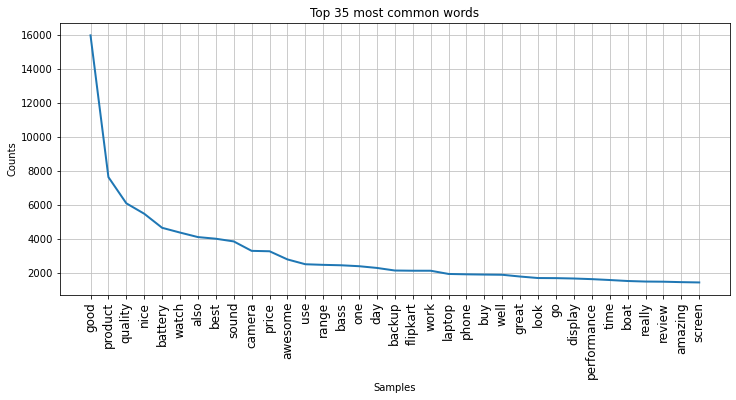

<AxesSubplot:title={'center':'Top 35 most common words'}, xlabel='Samples', ylabel='Counts'>

In [20]:
all_words = []
for line in list(df['Cleaned_Full Reviews']):
    words = line.split()
    for word in words:
        all_words.append(word)
plt.figure(figsize =(12,5))
plt.title('Top 35 most common words')
plt.xticks(fontsize = 12, rotation =90)
fd = nltk.FreqDist(all_words)
fd.plot(35, cumulative=False)

These are 35 most frequently used common words from the Cleaned_Full Reviews column according to its number of occurences in a descending order.

In [21]:
!pip install wordcloud
from wordcloud import WordCloud

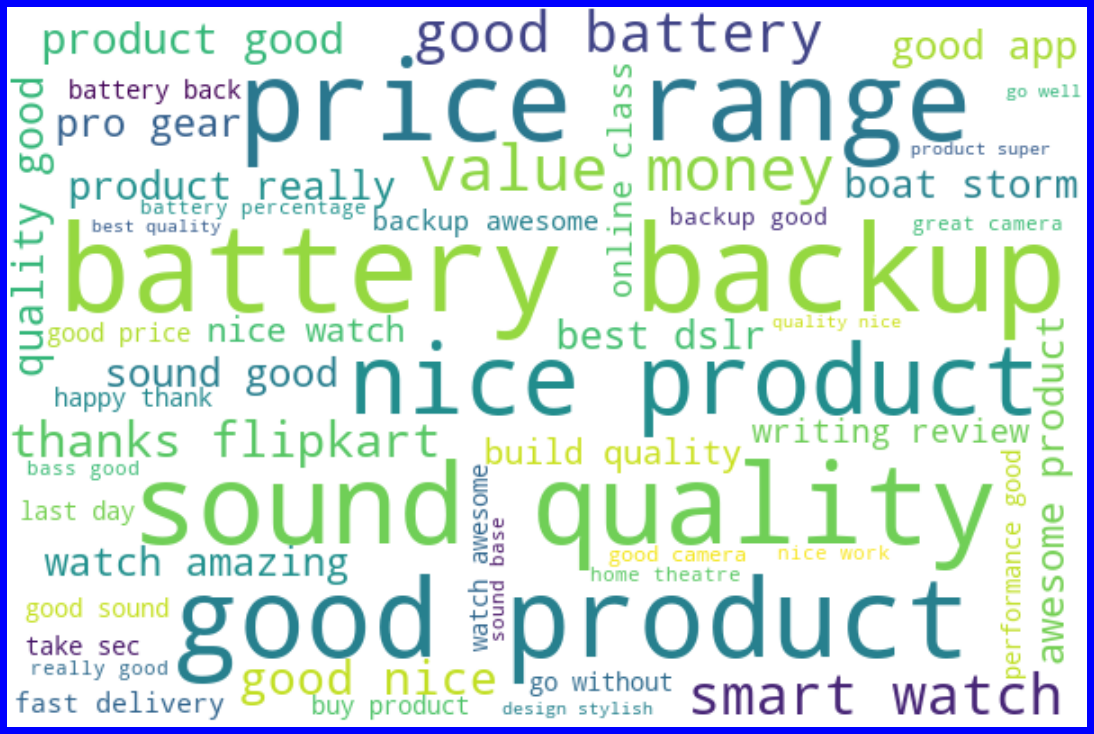

In [22]:
# Getting sense of loud words whose rating is 5
word = df['Cleaned_Full Reviews'][df['Ratings']==5]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(15,10),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

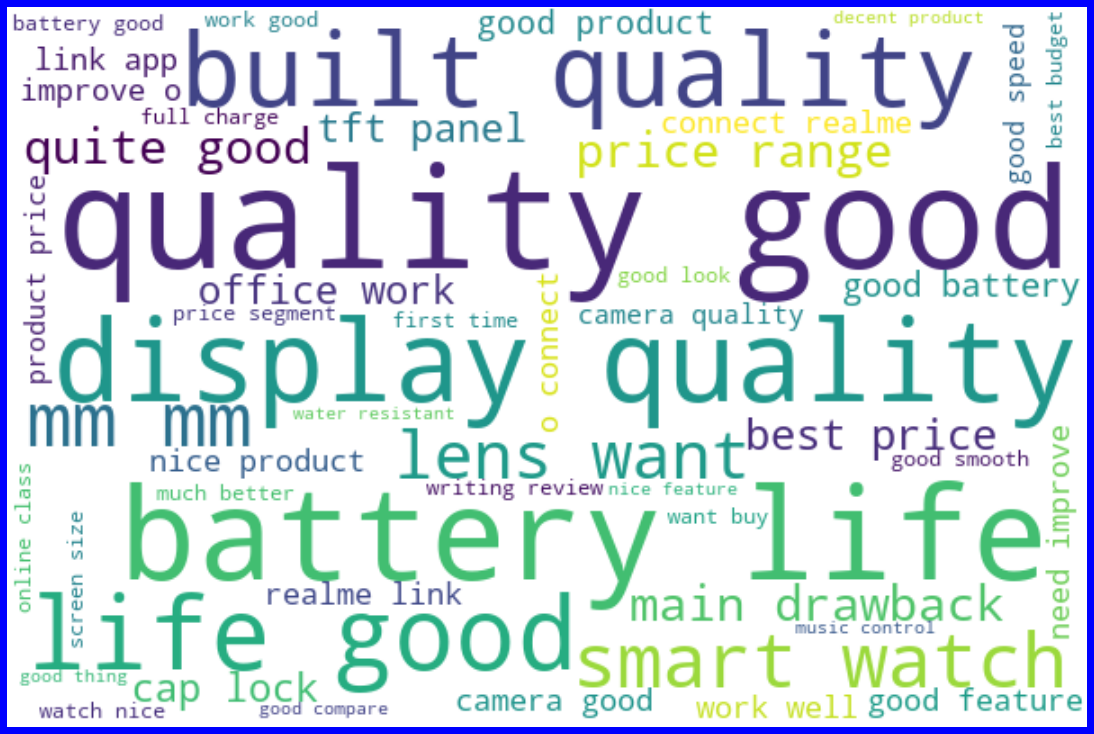

In [23]:
# Getting sense of loud words in Cleaned_Full Reviews column whose rating is 4
word = df['Cleaned_Full Reviews'][df['Ratings']==4]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(15,10),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

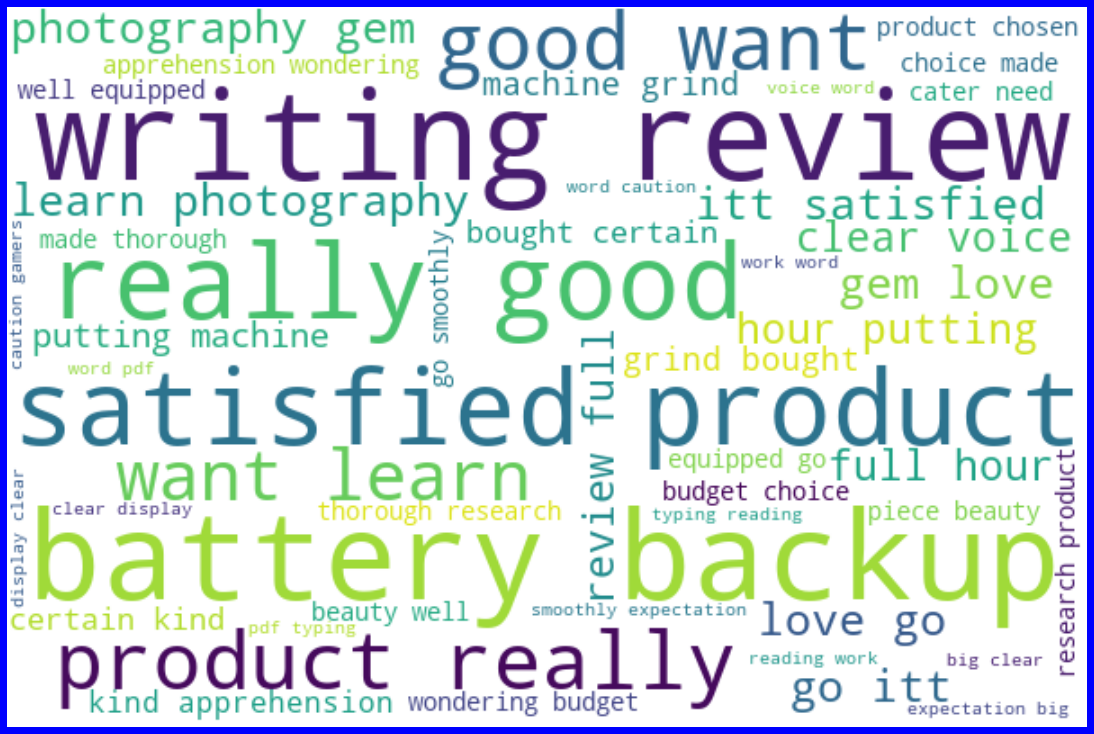

In [24]:
# Getting sense of loud words in Cleaned_Full Reviews column whose rating is 3
word = df['Cleaned_Full Reviews'][df['Ratings']==3]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(15,10),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

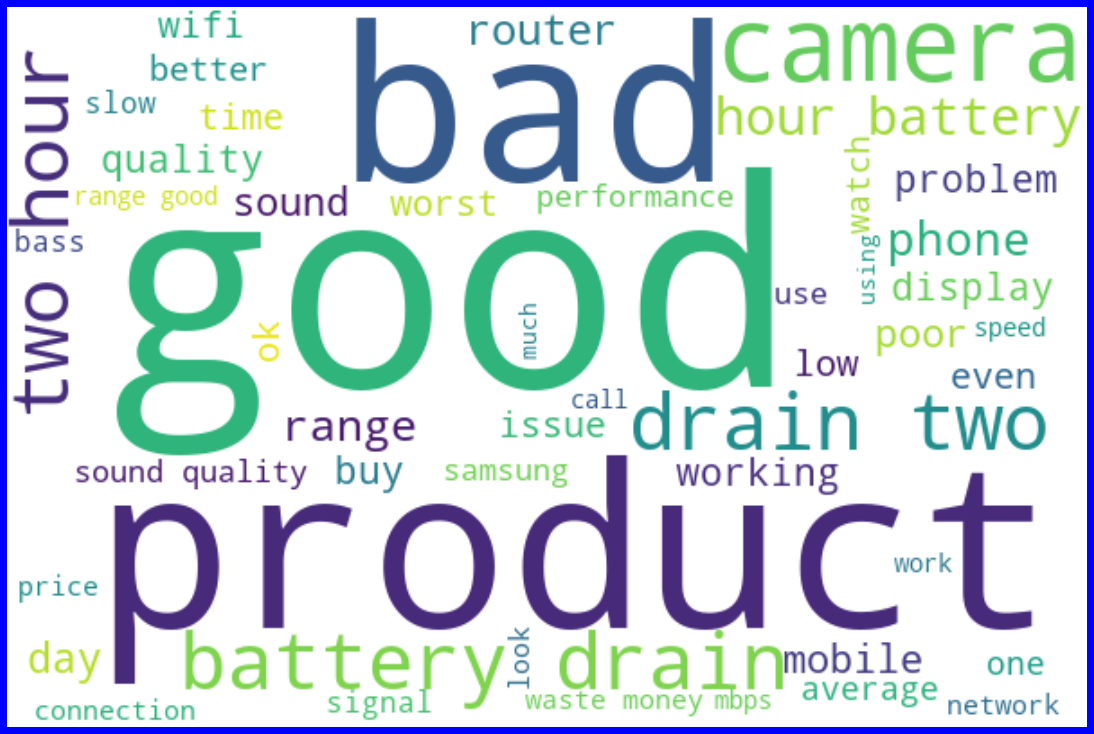

In [25]:
# Getting sense of loud words in Cleaned_Full Reviews column whose rating is 2
word = df['Cleaned_Full Reviews'][df['Ratings']==2]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(15,10),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

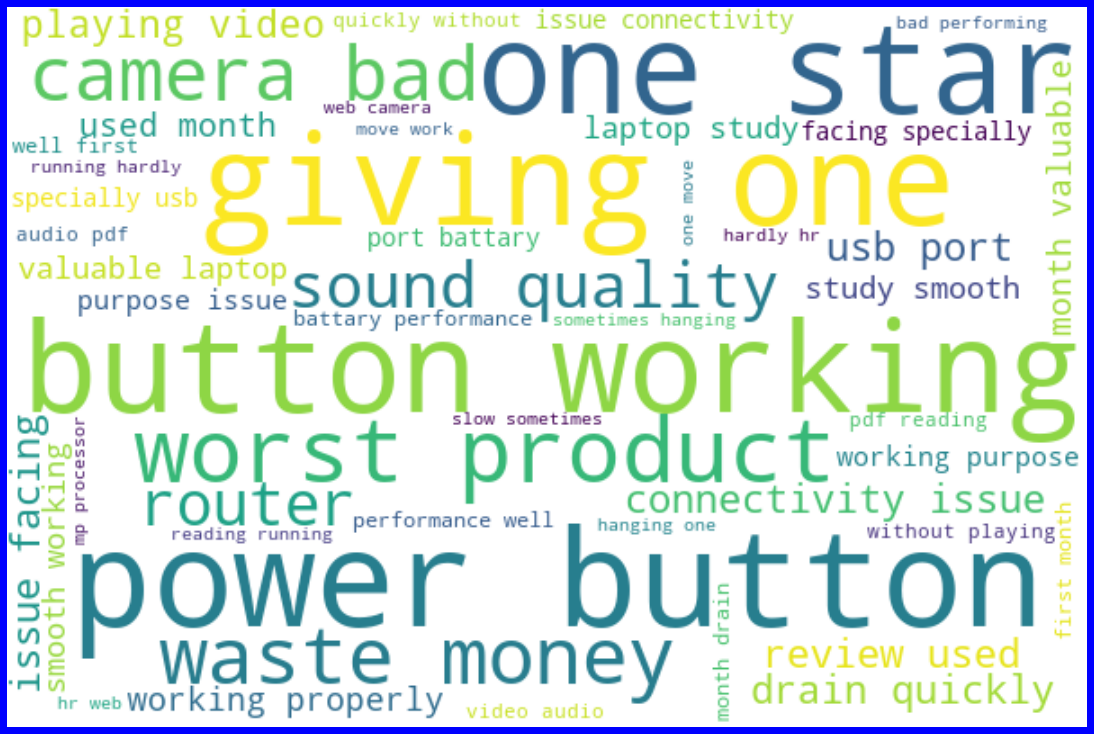

In [26]:
# Getting sense of loud words in Cleaned_Full Reviews column whose rating is 1
word = df['Cleaned_Full Reviews'][df['Ratings']==1]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(15,10),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
# Convert Cleaned_Full Reviews texts into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer(stop_words='english')

features = tf_vec.fit_transform(df['Cleaned_Full Reviews'])

In [28]:
X = features
y = df['Ratings']

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [30]:
# Here, we use SMOTE(resampling) method to cope up with imbalanced classification of target variable.
# SMOTE(Synthetic Minority Oversampling Technique) algorithm generates synthetic samples of minority class.
X_smote,y_smote = smote.fit_resample(X,y)
print(X.shape)
print(y.shape)

# check shape after oversampling  
print(X_smote.shape)
print(y_smote.shape)

(22593, 5672)
(22593,)
(66785, 5672)
(66785,)


In [31]:
# split data into train and test. Model will be build on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=51)

In [32]:
# Importing Classifier algorithms for model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


# Logistic Regression

In [33]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred = log_reg.predict(x_test)

In [35]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7946337665448883

In [36]:
## Cross Validation score to check if the model is overfitting
score= cross_val_score(log_reg,X_smote,y_smote,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.7243393  0.71003968 0.83124953 0.7086172  0.71213596]
0.7372763345062514
0.04731500477978279


In [37]:
# Confusion Matrix
conf_mat =confusion_matrix(y_test,y_pred)
conf_mat

array([[2666,  340,  248,   32,   24],
       [ 198, 2819,  224,   77,    9],
       [  93,  182, 2729,  257,   81],
       [  50,   84,  431, 2547,  257],
       [  48,   47,  305,  442, 2507]], dtype=int64)

In [38]:
print('\n-------------Classification Report-------------------')
print (classification_report(y_test,y_pred,digits=2))


-------------Classification Report-------------------
              precision    recall  f1-score   support

           1       0.87      0.81      0.84      3310
           2       0.81      0.85      0.83      3327
           3       0.69      0.82      0.75      3342
           4       0.76      0.76      0.76      3369
           5       0.87      0.75      0.81      3349

    accuracy                           0.79     16697
   macro avg       0.80      0.79      0.80     16697
weighted avg       0.80      0.79      0.80     16697



# DecisionTree Classifier

In [39]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = dt_clf.predict(x_test)  
dt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 91.85%
______________________________________________
CLASSIFICATION REPORT:
                      1             2             3            4  \
precision      0.983047      0.972422      0.816192     0.921515   
recall         0.923460      0.956231      0.942187     0.876952   
f1-score       0.952322      0.964259      0.874676     0.898682   
support    10047.000000  10030.000000  10015.000000  9988.000000   

                      5  accuracy     macro avg  weighted avg  
precision      0.919761  0.918483      0.922588      0.922642  
recall         0.893385  0.918483      0.918443      0.918483  
f1-score       0.906381  0.918483      0.919264      0.919311  
support    10008.000000  0.918483  50088.000000  50088.000000  
______________________________________________
Confusion Matrix:
 [[9278  149  589   16   15]
 [ 133 9591  299    2    5]
 [  17   67 9436  222  273]
 [   4   37  701 8759  487]
 [   6   19  

In [40]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_clf,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.7473235  0.76866063 0.88530359 0.78760201 0.77397619]
0.7925731826008835
0.04814318722929633


# Random Forest Classifier

In [41]:
rand_clf = RandomForestClassifier(random_state=51)
rand_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
rand_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = rand_clf.predict(x_test)  
rand_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 91.85%
______________________________________________
CLASSIFICATION REPORT:
                      1             2             3            4  \
precision      0.983047      0.972422      0.816192     0.921515   
recall         0.923460      0.956231      0.942187     0.876952   
f1-score       0.952322      0.964259      0.874676     0.898682   
support    10047.000000  10030.000000  10015.000000  9988.000000   

                      5  accuracy     macro avg  weighted avg  
precision      0.919761  0.918483      0.922588      0.922642  
recall         0.893385  0.918483      0.918443      0.918483  
f1-score       0.906381  0.918483      0.919264      0.919311  
support    10008.000000  0.918483  50088.000000  50088.000000  
______________________________________________
Confusion Matrix:
 [[9278  149  589   16   15]
 [ 133 9591  299    2    5]
 [  17   67 9436  222  273]
 [   4   37  701 8759  487]
 [   6   19  

In [42]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_clf,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.80654339 0.81163435 0.91831998 0.85707869 0.81620124]
0.8419555289361383
0.04218273738151949


# KNN Classifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_train)
knn_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = knn.predict(x_test)  
knn_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 86.22%
______________________________________________
CLASSIFICATION REPORT:
                      1             2             3            4  \
precision      0.965934      0.935028      0.701806     0.887134   
recall         0.905942      0.957029      0.935297     0.798759   
f1-score       0.934977      0.945901      0.801901     0.840630   
support    10047.000000  10030.000000  10015.000000  9988.000000   

                      5  accuracy     macro avg  weighted avg  
precision      0.885966  0.862203      0.875174      0.875242  
recall         0.713429  0.862203      0.862091      0.862203  
f1-score       0.790391  0.862203      0.862760      0.862853  
support    10008.000000  0.862203  50088.000000  50088.000000  
______________________________________________
Confusion Matrix:
 [[9102  275  639   23    8]
 [ 152 9599  268    3    8]
 [  40  215 9367  197  196]
 [  32  100 1171 7978  707]
 [  97   77 1

In [44]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.69416785 0.74927005 0.84262933 0.72291682 0.72366549]
0.7465299094107959
0.0511170264557282


# Support-Vector Machines

In [45]:
svc = SVC(kernel = 'rbf',C=1)
svc.fit(x_train,y_train)
pred=svc.predict(x_train)
svc_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = svc.predict(x_test)  
svc_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 88.23%
______________________________________________
CLASSIFICATION REPORT:
                      1             2             3            4  \
precision      0.961132      0.913924      0.773349     0.889300   
recall         0.886036      0.927318      0.902846     0.817982   
f1-score       0.922057      0.920572      0.833095     0.852151   
support    10047.000000  10030.000000  10015.000000  9988.000000   

                      5  accuracy     macro avg  weighted avg  
precision      0.898669  0.882347      0.887275      0.887327  
recall         0.877298  0.882347      0.882296      0.882347  
f1-score       0.887855  0.882347      0.883146      0.883198  
support    10008.000000  0.882347  50088.000000  50088.000000  
______________________________________________
Confusion Matrix:
 [[8902  429  636   61   19]
 [ 266 9301  399   48   16]
 [  60  283 9042  339  291]
 [  16   99 1039 8170  664]
 [  18   65  

In [46]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(svc,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.83012653 0.79725986 0.89593472 0.84652242 0.81799805]
0.8375683162386764
0.03331654066153871


# Gradient Boosting Classifier

In [47]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = gbdt_clf.predict(x_test)  
gbdt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 74.89%
______________________________________________
CLASSIFICATION REPORT:
                      1             2             3            4  \
precision      0.851281      0.652047      0.662812     0.852882   
recall         0.737235      0.827119      0.732501     0.675611   
f1-score       0.790164      0.729223      0.695916     0.753966   
support    10047.000000  10030.000000  10015.000000  9988.000000   

                      5  accuracy     macro avg  weighted avg  
precision      0.797604  0.748902      0.763325      0.763295  
recall         0.771783  0.748902      0.748850      0.748902  
f1-score       0.784481  0.748902      0.750750      0.750762  
support    10008.000000  0.748902  50088.000000  50088.000000  
______________________________________________
Confusion Matrix:
 [[7407 1683  800   72   85]
 [ 891 8296  691   39  113]
 [ 237 1423 7336  382  637]
 [  71  667 1377 6748 1125]
 [  95  654  

In [48]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(gbdt_clf,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.69603953 0.67036011 0.78161264 0.66714083 0.70869207]
0.7047690349629407
0.041464177265597014


In [57]:
accuracy =[79.46,84.31,87.87,84.06,85.97,73.72]
cross_val_score=[73.72,79.25,84.19,74.65,83.75,70.47]

model=['Logistic Regression','Decision Tree','Random Forest','KNN','SVM','Gradient']
best_model=pd.DataFrame({'Model':model,'Accuracy':accuracy,'Cross validation score':cross_val_score})
best_model

,Model,Accuracy,Cross validation score
0,Logistic Regression,79.46,73.72
1,Decision Tree,84.31,79.25
2,Random Forest,87.87,84.19
3,KNN,84.06,74.65
4,SVM,85.97,83.75
5,Gradient,73.72,70.47


# Random Forest model is our best model because the difference between its accuracy and CV score is least than other models.


# Using GridSearchCV for hyper parameter tuning on best model 

In [58]:
grid_param = {'criterion':['gini','entropy'],'max_depth':[15,20,30,40,50,70,90,120,150,180,210,240,270,300,330]}

In [59]:
grid_search = GridSearchCV(estimator=rand_clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=-1)

In [61]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 270}


In [63]:
rand_clf = RandomForestClassifier(criterion ='entropy', max_depth= 270)
rand_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=270)

In [64]:
rand_clf.score(x_test,y_test)

0.8798586572438163

# Model Saving

In [65]:
# saving the model to local system
filename = 'Ratings_Prediction_model.pickle'
pickle.dump(rand_clf,open(filename,'wb'))